# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# FEATRUES:
# url is the only important thing at first look. if i need more features i'll obtain it later
# COLUMN OF FEATURE
# our column will be type, in fisrt assumption
# TRANSFORM
# personally i will transform all columns that are not int64 (described below)

# Internet Provider Security (IPS). webpages without it are suspicious on my behalf. but it also coud be 
# intrusion Prevention System.. so...Maybe??

In [4]:
# Your code here
websites.describe()
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
# old school way 
for e in websites:
    print(f"{e}: {websites[e].dtype}")

URL: object
URL_LENGTH: int64
NUMBER_SPECIAL_CHARACTERS: int64
CHARSET: object
SERVER: object
CONTENT_LENGTH: float64
WHOIS_COUNTRY: object
WHOIS_STATEPRO: object
WHOIS_REGDATE: object
WHOIS_UPDATED_DATE: object
TCP_CONVERSATION_EXCHANGE: int64
DIST_REMOTE_TCP_PORT: int64
REMOTE_IPS: int64
APP_BYTES: int64
SOURCE_APP_PACKETS: int64
REMOTE_APP_PACKETS: int64
SOURCE_APP_BYTES: int64
REMOTE_APP_BYTES: int64
APP_PACKETS: int64
DNS_QUERY_TIMES: float64
Type: int64


In [6]:
# good way
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [7]:
# aquí hay cosas de diferente tipo. cosas bonitas, cosas menos bonitas. 
# podría hacer un insa() y todo eso pero de momento es suficiente

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

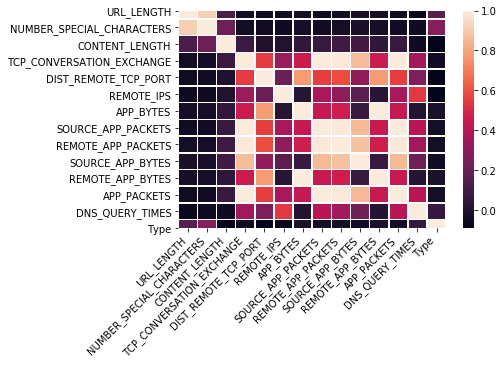

In [8]:
# IMP! _get_numeric_data() is awesome

corr = websites._get_numeric_data().corr()
# ------
ax = sns.heatmap(
    corr, 
    linewidths=.5
    
    #vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax


In [9]:
#allright, this is fun.

#it results that columns with high collinearity are not useful (in the same way t
# hat features with high
#collinearity aren't. 
#- so we take a look to my beautiful sns plot and we should remove the brightest 
#ones (when they're bright)
#with many other columns#
#
#for instance:
#- app_packets, remote_app_packages and tcp_conversation_exchange. they match with 
# a lot of columns

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
rm1=websites.drop(["APP_PACKETS"],axis=1)

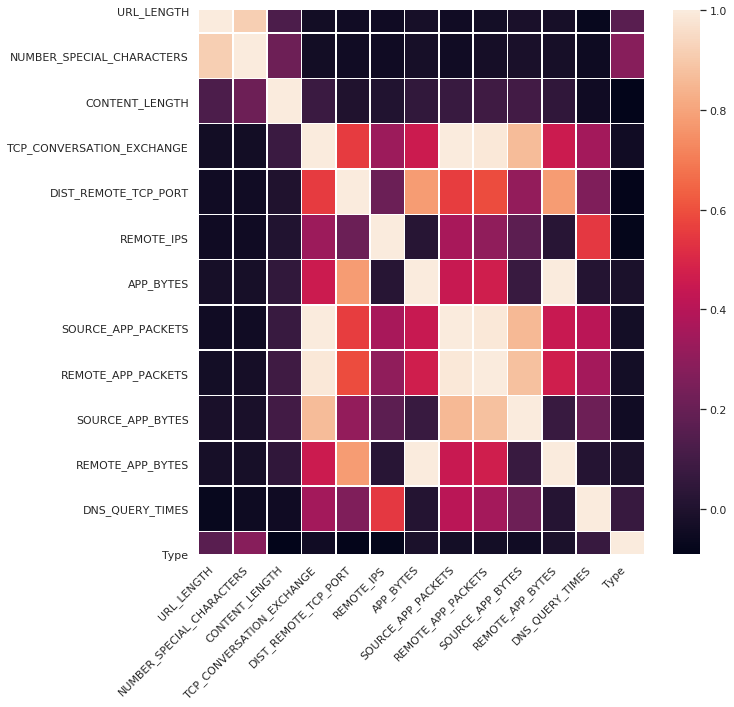

In [11]:
corr1 = rm1.corr()
# ------
ax = sns.heatmap(
    corr1, 
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax

In [12]:
rm2=rm1.drop(["REMOTE_APP_PACKETS"],axis=1)

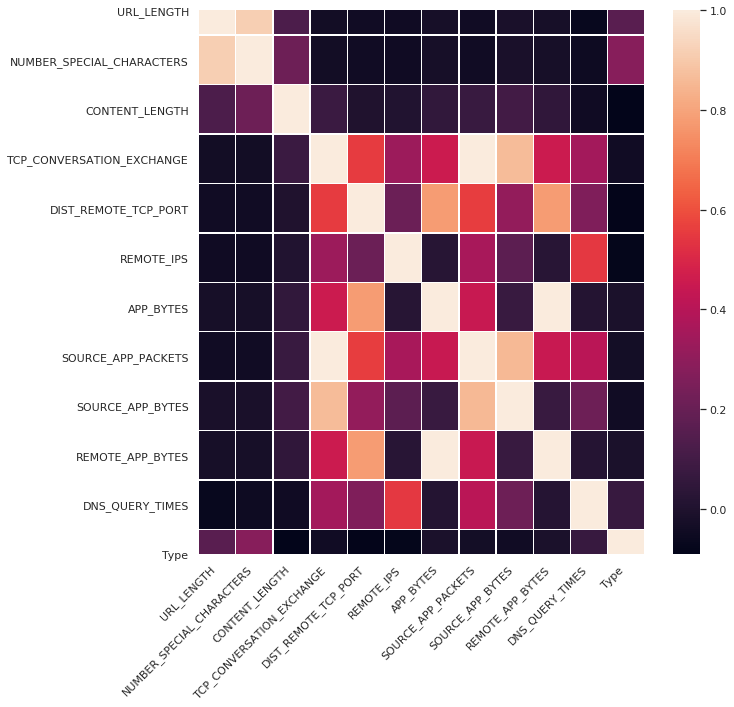

In [13]:
corr2 = rm2.corr()
# ------
ax = sns.heatmap(
    corr2, 
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax

In [14]:
rm3=rm2.drop(["TCP_CONVERSATION_EXCHANGE"],axis=1)

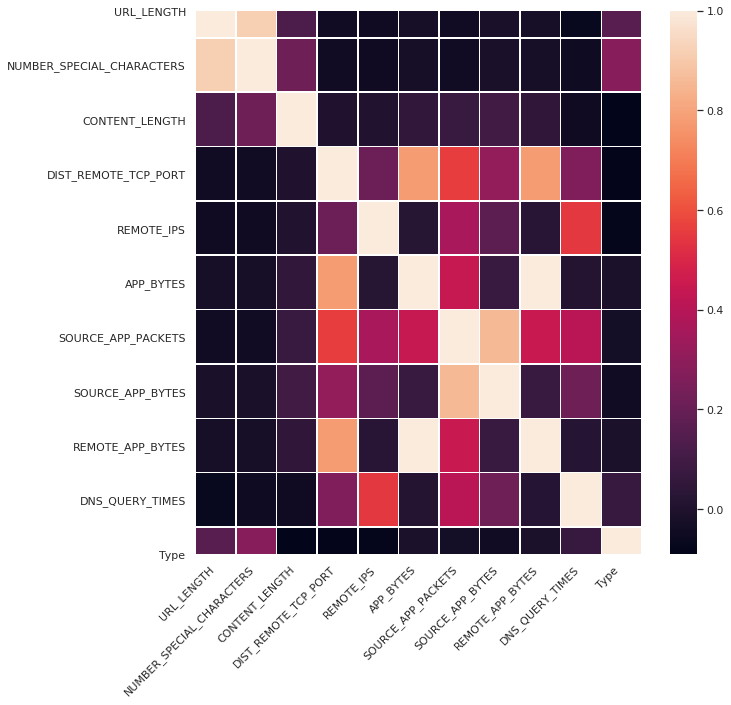

In [15]:
corr3 = rm3.corr()
# ------
ax = sns.heatmap(
    corr3, 
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})
ax

In [16]:
# I'll leave app_bytes, let's see what happens

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [17]:
# important command
rm3.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [18]:
# Your code here
len(rm3.CONTENT_LENGTH)
# from 1781 rows in content lengh almost 1/2 is missing. this column qualifies to be removed

1781

In [19]:
data_clean=rm3.drop(["CONTENT_LENGTH"], axis=1)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [20]:
# Examine missing values in each column
data_clean.isna().sum()
# this is so sweet :D

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [21]:
# Your code here  
# data_clean.WHOIS_COUNTRY.value_counts(), or data_clean.WHOIS_COUNTRY.unique()

# [u'GB'; u'UK']   Cyprus  United Kingdom

In [22]:
data_clean.WHOIS_COUNTRY=data_clean.WHOIS_COUNTRY.replace(to_replace={"Cyprus":"Cy",'United Kingdom':"UK","[u'GB'; u'UK']":"UK","GB":"UK"})

In [23]:
data_clean.WHOIS_COUNTRY.value_counts()

US      1103
None     306
CA        84
ES        63
UK        35
AU        35
PA        21
JP        11
IN        10
CN        10
FR         9
CZ         9
CH         6
NL         6
KR         5
BS         4
AT         4
PH         4
ru         4
SC         3
DE         3
KY         3
TR         3
SE         3
HK         3
us         3
BE         3
UY         2
BR         2
NO         2
SI         2
KG         2
RU         2
UA         2
IL         2
Cy         2
AE         1
IT         1
UG         1
BY         1
LU         1
IE         1
TH         1
LV         1
se         1
PK         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<BarContainer object of 46 artists>

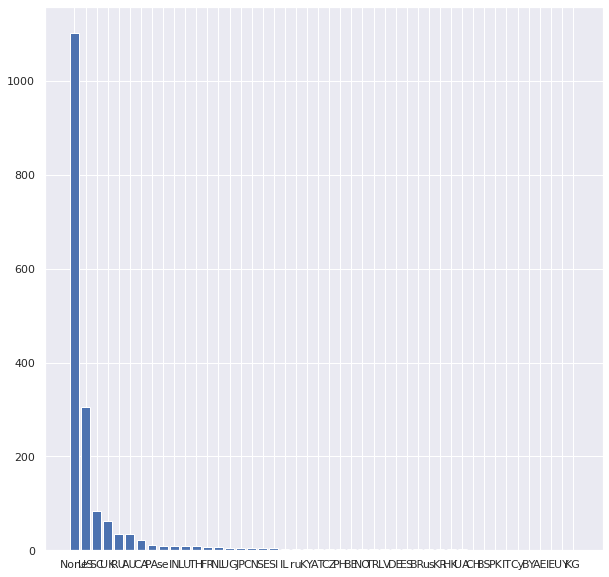

In [24]:
# Your code here
plt.bar(data_clean.WHOIS_COUNTRY.unique(), data_clean.WHOIS_COUNTRY.value_counts())

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [25]:
# Your code here
top10=list(data_clean.WHOIS_COUNTRY.value_counts()[:10].index)
# now we'll run a command to filter by the list above and if the element is not in the list, change by OTHER

In [26]:
print(top10)

['US', 'None', 'CA', 'ES', 'UK', 'AU', 'PA', 'JP', 'IN', 'CN']


In [27]:
for e in data_clean.WHOIS_COUNTRY:
    if e not in top10:
        data_clean.WHOIS_COUNTRY.replace(e,"Other",inplace=True)

In [28]:
data_clean.shape # :D

(1781, 17)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [29]:
# Your code here
data_removed=data_clean.drop(["WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"], axis=1)
# como he creado otro df, no necesito escribir inplace=True

In [30]:
data_removed.shape # :D

(1781, 14)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [31]:
# Your code here
data_removed.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [32]:
# Your code here
data_removed=data_clean.drop(["URL"], axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [33]:
# Your code here
data_removed.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

## Before you think of your own solution, don't read the instructions that come next.

### Os dais cuenta de lo mal que está esta frase?? Los labs tienen revisión 0

In [34]:
# Your code here
# pues hago un lowercase o un uppercase,y todo en mayúsculas
data_removed.CHARSET=data_removed.CHARSET.replace(to_replace={
    'utf-8':'UTF-8',
    'iso-8859-1':'ISO-8859-1'
})

![Think Hard](../think-hard.jpg)

In [35]:
# Your comment here
# un uppercase era más fácil

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [36]:
# Your code here
data_removed.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [37]:
# Count `SERVER` value counts here
data_removed.SERVER.value_counts()

Apache                                                                                                      386
nginx                                                                                                       211
None                                                                                                        175
Microsoft-HTTPAPI/2.0                                                                                       113
cloudflare-nginx                                                                                             94
                                                                                                           ... 
mw2233.codfw.wmnet                                                                                            1
nginx/0.8.35                                                                                                  1
nginx/1.10.0 (Ubuntu)                                                                                   

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [38]:
# Your code here
#I know i can do it better but i really want to move foward ML

# i tried unsuscessfully regex
#import re
for i,e in enumerate(data_removed.SERVER):
    if "Microsoft" in str(e):
        data_removed.SERVER[i]="Microsoft"
    elif "Apache/" in str(e):
        data_removed.SERVER[i]="Apache"
    elif "nginx" in str(e):
        data_removed.SERVER[i]="Nginx"
        
    else:
        data_removed.SERVER[i]="Other"
#a=re.sub("^(.*?)(\bMicrosoft\b)(.*)$","Microsoft",e)

/home/vargas/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/vargas/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/vargas/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [39]:
data_removed.SERVER.unique()

array(['Nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [40]:
website_dummy=pd.get_dummies(data_removed.SERVER, drop_first=True)

In [41]:
website_dummy.columns

Index(['Microsoft', 'Nginx', 'Other'], dtype='object')

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [42]:
# Your code here
website_dummy.dtypes

Microsoft    uint8
Nginx        uint8
Other        uint8
dtype: object

In [43]:
dataf=pd.concat([data_removed,website_dummy])

/home/vargas/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [63]:
dataf=dataf.fillna(0)
dataf.head(3)
#dataf=dataf.drop("SERVER",axis=1,inplace=True)

,APP_BYTES,CHARSET,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,Microsoft,NUMBER_SPECIAL_CHARACTERS,Nginx,Other,REMOTE_APP_BYTES,REMOTE_IPS,SERVER,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,Type,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE
0,700.0,ISO-8859-1,0.0,2.0,0.0,7.0,0.0,0.0,832.0,2.0,Nginx,1153.0,9.0,1.0,16.0,None,10/10/2015 18:21,None,None
1,1230.0,UTF-8,7.0,0.0,0.0,6.0,0.0,0.0,1230.0,4.0,Apache,1265.0,17.0,0.0,16.0,None,None,None,None
2,0.0,us-ascii,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,Microsoft,0.0,0.0,0.0,16.0,None,None,None,None


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
dataf.columns

Index(['APP_BYTES', 'CHARSET', 'DIST_REMOTE_TCP_PORT', 'DNS_QUERY_TIMES',
       'Microsoft', 'NUMBER_SPECIAL_CHARACTERS', 'Nginx', 'Other',
       'REMOTE_APP_BYTES', 'REMOTE_IPS', 'SERVER', 'SOURCE_APP_BYTES',
       'SOURCE_APP_PACKETS', 'Type', 'URL_LENGTH', 'WHOIS_COUNTRY',
       'WHOIS_REGDATE', 'WHOIS_STATEPRO', 'WHOIS_UPDATED_DATE'],
      dtype='object')

In [145]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [155]:
# Your code here:
y = dataf['Type']
X = dataf[["DNS_QUERY_TIMES",
           "NUMBER_SPECIAL_CHARACTERS","URL_LENGTH"
          ]]

In [157]:

df = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [158]:
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts()[1] / len(y_train)

(3562, 3) (3562,)
(2849, 3) (713, 3) (2849,) (713,)


0.05896805896805897

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [159]:
# Your code here:
from sklearn.linear_model import LogisticRegression

In [176]:
# Entrena el modelo
clf = LogisticRegression().fit(X_train, y_train)

/home/vargas/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [177]:
# Your code here:
pred = clf.predict(X_test)

In [178]:
import numpy as np
scores = pd.DataFrame({
    "predicted":pred,
    "gt":y_test
})
scores["diff"] = np.abs(scores["predicted"]-scores["gt"])
# imp! prediction is that stuff
prediction=1-scores["diff"].sum()/ len(y_test)
prediction

0.9326788218793829

SyntaxError: invalid syntax (<ipython-input-179-8df4cce29edf>, line 1)

,predicted_type,prob_yes,prob_no
31,0.0,0.042049,0.957951
1172,0.0,0.225900,0.774100
809,0.0,0.006116,0.993884
1078,0.0,0.006116,0.993884
1218,0.0,0.006116,0.993884


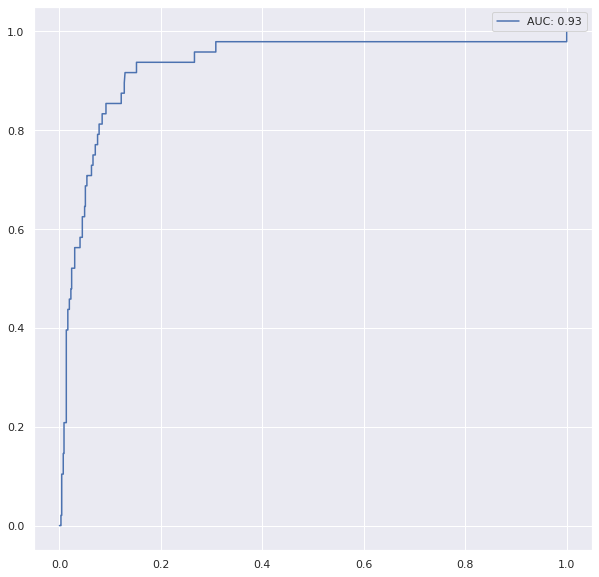

In [182]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_score = clf.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "predicted_type":y_test,  # y_test 
    "prob_yes":y_score[:,1],
    "prob_no":y_score[:,0]
}).head())

plt.plot(roc[0],roc[1])
plt.legend([f"AUC: {round(roc_auc_score(y_test, y_score[:,1]),2)}"])

# tengo una buena función roc... no tengo mucha idea de si estoy haciendo esto bien

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

[[660   5]
 [ 43   5]]


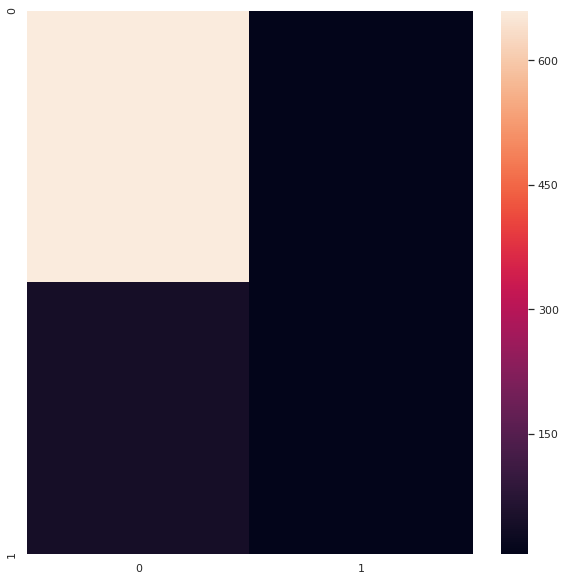

In [197]:
# Your code here:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

matrix = confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix)

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
# my confusion matrix says:
# TRUE POSITIVES  || FALSE NEGATIVES
# FALSE POSITIVES || TRUE NEGATIVES

#  No es un buen modelo porque no predice los true negatives, o sea, todo lo califica como true positive casi
# debemos tocar las features para controlar esto, así que es la bajona que tengamos un 95% de acierto a la hora
# de predecir algo, y resulta que no es correcto lo que predecimos.
# 

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here